## A/B Testing for Marketing

**A/B Testing is a randomized experiment which evaluates which variant performs better.
Prior to running the test, an hypothesis must be developed and define which metric we are trying to impact**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marketing = pd.read_csv('./datasets/marketing.csv')

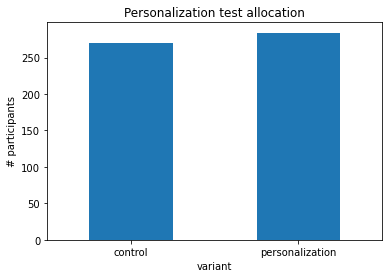

In [2]:
#let's first isolate the rows of the DS where the channel is Email
email = marketing[marketing['marketing_channel'] == 'Email']

alloc = email.groupby(['variant'])['user_id'].nunique()

alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xticks(rotation = 0)
plt.ylabel('# participants')
plt.show()

In [3]:
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()

subscribers_df = pd.DataFrame(subscribers.unstack(level = 1))

control = subscribers_df['control'].dropna()

personalization = subscribers_df['personalization'].dropna()

print(subscribers_df)

variant    control personalization
user_id                           
a100000526     NaN            True
a100000530     NaN            True
a100000534     NaN           False
a100000538     NaN            True
a100000542     NaN            True
...            ...             ...
a100007288    True             NaN
a100007289    True             NaN
a100007290    True             NaN
a100007291    True             NaN
a100007293    True             NaN

[553 rows x 2 columns]


In [4]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


## Calculating Lift and Statistical Significance

**Lift is the difference between the A and B conversion rates divided by B conversion rate. In this case it would be:**

\begin{equation*}
\text{Lift} = \frac{\text{Treatment conversion rate - Control conversion rate}}{\text{Control conversion rate}}
\end{equation*}

**The result is the relative percent difference of treatment compared to control**

In [5]:
#Calculate the mean or conversion rate of control and personalization groups
a_mean = np.mean(control)
b_mean = np.mean(personalization)

#Calculate the lift
lift = (b_mean - a_mean)/ a_mean

print("lift:", str(round(lift*100,2)) + '%')

lift: 38.85%


**Statistical significance is vital to understand if a test showed positive result by chance or if it's reflective of a true difference between variants**

In [6]:
from scipy.stats import ttest_ind

t = ttest_ind(control, personalization)

print(t)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.0064514878446941745)


**Given that p is 0.006, we can conclude that the results are statistically significant**